In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import json
import urllib.request
import os
from flask import render_template, request, redirect, app

In [2]:
def do_something_pretty(jsondata):
    """We want to process the AML json result to be more human readable and understandable"""
    import itertools # for flattening a list of tuples below

    # We only want the first array from the array of arrays under "Value" 
    # - it's cluster assignment and distances from all centroid centers from k-means model
    value = jsondata["Results"]["output1"]["value"]["Values"][0]
    
    print(value)

#     output='The response from Customer : ' +value[8]

    return value

In [3]:
ML_KEY=os.environ.get('API_KEY', "UXjxG8o1TBboTNmk3uiI5Hc0IaB+qAyS8g8JDd27MMvmmdU88VN/vgo7I6cWV4maPuYE2xDfvCVuG6GklBVxsQ==")
ML_URL = os.environ.get('URL', "https://ussouthcentral.services.azureml.net/workspaces/6f51976e43574b7eb7a64306a5d08410/services/ec1670a4b69d467584b89d1107c2480d/execute?api-version=2.0&details=true")

In [4]:
# state = 'Washington'
# custlifetime = 2763
# coverage = 'Basic'
# claimamount = 384
# vehicleclass = 'Two-Door Car'
# vehiclesize = 'Medsize'

# state = 'Arizona'
# custlifetime = 6979.535903
# coverage = 'Extended'
# claimamount = 1131.464935
# vehicleclass = 'Four-Door Car'
# vehiclesize = 'Medsize'

# state = 'California'
# custlifetime = 7645.861827
# coverage = 'Extended'
# claimamount = 529.881344
# vehicleclass = 'SUV'
# vehiclesize = 'Medsize'

state = 'California'
custlifetime = [0, 10000, 200]
coverage = 'Extended'
claimamount = 529.881344
vehicleclass = 'SUV'
vehiclesize = 'Medsize'

x_data = []
y_data = []

In [5]:
for i in range (custlifetime[0], custlifetime[1]+custlifetime[2], custlifetime[2]):
    data = {"Inputs": {"input1": {"ColumnNames": ["State","Customer Lifetime Value","Coverage","Monthly Premium Auto",
                                                  "Total Claim Amount","Vehicle Class","Vehicle Size"],
                                  "Values": [[state,i,coverage,"",claimamount,vehicleclass,vehiclesize]]
                                 }
                      },
            "GlobalParameters": {}
           }
    # Serialize the input data into json string
    body = str.encode(json.dumps(data))
    HEADERS = {'Content-Type':'application/json', 'Authorization':('Bearer '+ ML_KEY)}
    req = urllib.request.Request(ML_URL, body, HEADERS)
    response = urllib.request.urlopen(req)
    respdata = response.read()
    result = json.loads(str(respdata, 'utf-8'))
    result = do_something_pretty(result)
    x_data.append(i)
    y_data.append(result[7])

['California', '0', 'Extended', None, '529.881344', 'SUV', 'Medsize', '133.245616436005']
['California', '200', 'Extended', None, '529.881344', 'SUV', 'Medsize', '133.253299355507']
['California', '400', 'Extended', None, '529.881344', 'SUV', 'Medsize', '133.260991126299']
['California', '600', 'Extended', None, '529.881344', 'SUV', 'Medsize', '133.268674045801']
['California', '800', 'Extended', None, '529.881344', 'SUV', 'Medsize', '133.276356965303']
['California', '1000', 'Extended', None, '529.881344', 'SUV', 'Medsize', '133.284039884806']
['California', '1200', 'Extended', None, '529.881344', 'SUV', 'Medsize', '133.291731655598']
['California', '1400', 'Extended', None, '529.881344', 'SUV', 'Medsize', '133.29942342639']
['California', '1600', 'Extended', None, '529.881344', 'SUV', 'Medsize', '133.307106345892']
['California', '1800', 'Extended', None, '529.881344', 'SUV', 'Medsize', '133.314789265394']
['California', '2000', 'Extended', None, '529.881344', 'SUV', 'Medsize', '133.

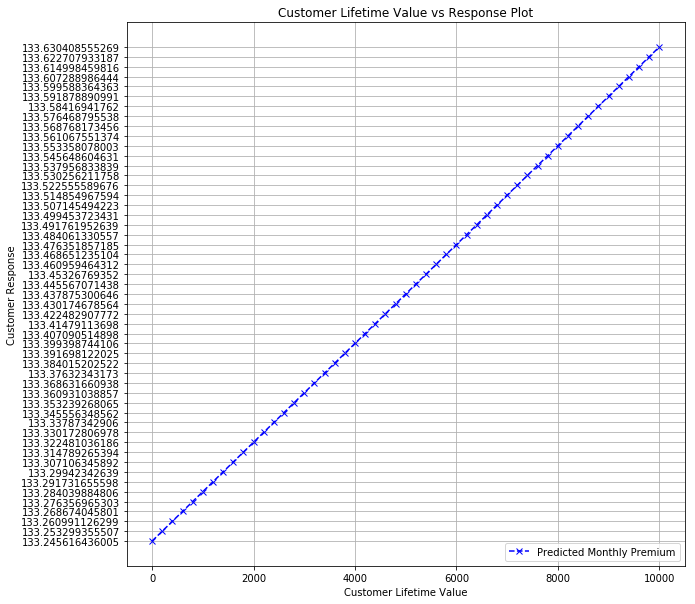

In [6]:
fig_one = plt.figure(figsize=(10,10))
plt.plot(x_data, y_data, c="blue", linestyle='dashed', marker='x', label="Predicted Monthly Premium")
plt.grid()
plt.legend(loc='lower right')
plt.title("Customer Lifetime Value vs Monthly Premium Plot")
plt.xlabel('Customer Lifetime Value')
plt.ylabel('Predicted Monthly Premium $')
plt.show()
# fig_one.savefig('cust_lifetime_response.png')

In [10]:
state = 'California'
custlifetime = 7645.861827
coverage = 'Basic'
claimamount = [0, 10000, 200]
vehicleclass = 'SUV'
vehiclesize = 'Medsize'

x_data_two = []
y_data_two = []

In [11]:
for i in range (claimamount[0], claimamount[1]+claimamount[2], claimamount[2]):
    data = {"Inputs": {"input1": {"ColumnNames": ["State","Customer Lifetime Value","Coverage","Monthly Premium Auto",
                                                  "Total Claim Amount","Vehicle Class","Vehicle Size"],
                                  "Values": [[state,custlifetime,coverage,"",i,vehicleclass,vehiclesize]]
                                 }
                      },
            "GlobalParameters": {}
           }
    # Serialize the input data into json string
    body = str.encode(json.dumps(data))
    HEADERS = {'Content-Type':'application/json', 'Authorization':('Bearer '+ ML_KEY)}
    req = urllib.request.Request(ML_URL, body, HEADERS)
    response = urllib.request.urlopen(req)
    respdata = response.read()
    result = json.loads(str(respdata, 'utf-8'))
    result = do_something_pretty(result)
    x_data_two.append(i)
    y_data_two.append(result[7])

['California', '7645.861827', 'Basic', None, '0', 'SUV', 'Medsize', '106.159085422754']
['California', '7645.861827', 'Basic', None, '200', 'SUV', 'Medsize', '106.500568181276']
['California', '7645.861827', 'Basic', None, '400', 'SUV', 'Medsize', '106.843157351017']
['California', '7645.861827', 'Basic', None, '600', 'SUV', 'Medsize', '107.186835229397']
['California', '7645.861827', 'Basic', None, '800', 'SUV', 'Medsize', '107.531619518995']
['California', '7645.861827', 'Basic', None, '1000', 'SUV', 'Medsize', '107.877510219812']
['California', '7645.861827', 'Basic', None, '1200', 'SUV', 'Medsize', '108.224516183138']
['California', '7645.861827', 'Basic', None, '1400', 'SUV', 'Medsize', '108.572637408972']
['California', '7645.861827', 'Basic', None, '1600', 'SUV', 'Medsize', '108.921873897314']
['California', '7645.861827', 'Basic', None, '1800', 'SUV', 'Medsize', '109.272243350744']
['California', '7645.861827', 'Basic', None, '2000', 'SUV', 'Medsize', '109.623736917973']
['Cali

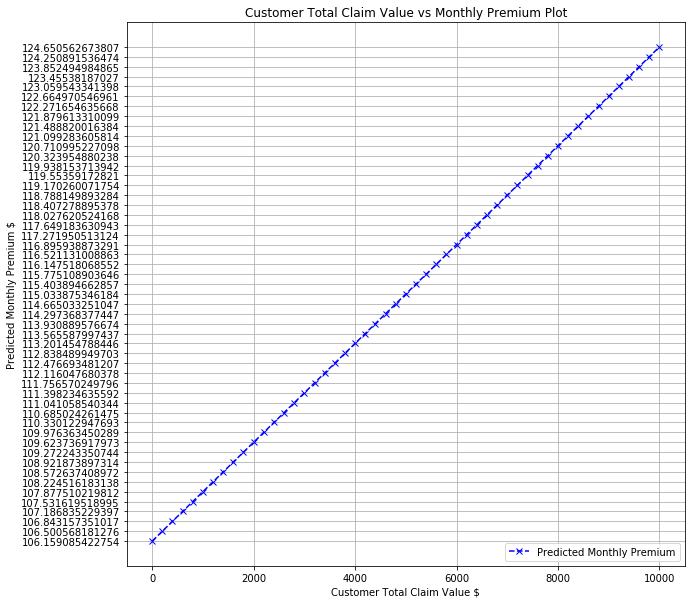

In [13]:
fig_two = plt.figure(figsize=(10,10))
plt.plot(x_data_two, y_data_two, c="blue", linestyle='dashed', marker='x', label="Predicted Monthly Premium")
plt.grid()
plt.legend(loc='lower right')
plt.title("Customer Total Claim Value vs Monthly Premium Plot")
plt.xlabel('Customer Total Claim Value $')
plt.ylabel('Predicted Monthly Premium $')
plt.show()
# fig_one.savefig('cust_lifetime_response.png')